Click this link for instructions: https://tinyurl.com/ccbm-dressing-directions

For Activity #2, you can use this spreadsheet https://tinyurl.com/ccbm-dressing-sheet (go to File -> Make a Copy)

For yesterday's intro slides, click [here](https://sites.ucmerced.edu/files/bellergroup/files/ccbm_virtual_sessions_2021_overview.pdf).


In [ ]:
""" Oil-Vinegar Phase Separation Simulation using Cahn-Hilliard Theory """

# RUN THIS CELL ONCE!

from matplotlib.pyplot import subplots, show
import numpy as np
from IPython.display import clear_output
from numba import njit
%matplotlib inline


@njit(fastmath=True)
def plus_laplacian(arr, out):
    """ Add the Laplacian of array `arr` to array `out` """
    Lx, Ly = arr.shape
    for i in range(Lx):
        iup = (i + 1) % Lx
        idn = (i - 1) % Lx
        for j in range(Ly):
            jup = (j + 1) % Ly
            jdn = (j - 1) % Ly
            out[i,j] += 0.25 * (
                2 * (arr[iup, j] + arr[idn, j] + arr[i, jup] + arr[i, jdn])
                + arr[iup, jup] + arr[iup, jdn] + arr[idn, jup] + arr[idn, jdn]
                - 12 * arr[i, j]
            )


@njit(fastmath=True)
def update_phi(phi, dt_D, inverse_length_scale, c0_sq, n_reps):
    """ Euler update """
    Lx, Ly = phi.shape
    tmp_arr = np.empty_like(phi)
    for rep in range(n_reps):
        tmp_arr[:, :] = 0.
        plus_laplacian(phi, tmp_arr)
        for i in range(Lx):
            for j in range(Ly):
                phi_here = phi[i, j]
                tmp_arr[i, j] *= -inverse_length_scale
                tmp_arr[i, j] += phi_here * (phi_here**2 - c0_sq)
                tmp_arr[i, j] *= dt_D
        plus_laplacian(tmp_arr, phi)


def update_plot(phi):
    fig, ax1 = subplots(1, 1, figsize=(12, 6))
    fig.tight_layout()
    color_plot = ax1.imshow(50 * (1. + phi), cmap='inferno_r', vmin=0, vmax=100)
    cbar = fig.colorbar(
        color_plot, fraction=0.046, pad=0.04, ax=ax1,
        orientation='horizontal', label='% vinegar'
    )
    ax1.axis('off')
    clear_output(wait=True)
    show()


def run_simulation(
    surface_tension=1,
    percent_oil=50,
    Lx = 100,                 # number of sites in each direction
    init_noise = 0.01,        # controls randomness of initial condition
    update_plot_wait = 2000,  # how often to update plot
    D = 1.,                   # diffusion constant
    c0 = 0.95                 # oil fraction at equilibrium
):
    dt = 0.1 * min(surface_tension, 0.75)**2    # timestep

    # fill with oil/water ratio
    phi = np.random.choice(
        [-1., 1.], p=[percent_oil/100, 1.-percent_oil/100], size=(Lx, Lx)
    )

    # loop over update step
    while True: # loop infinitely
        update_plot(phi)
        update_phi(phi, dt * D, surface_tension**(-2), c0**2, update_plot_wait)


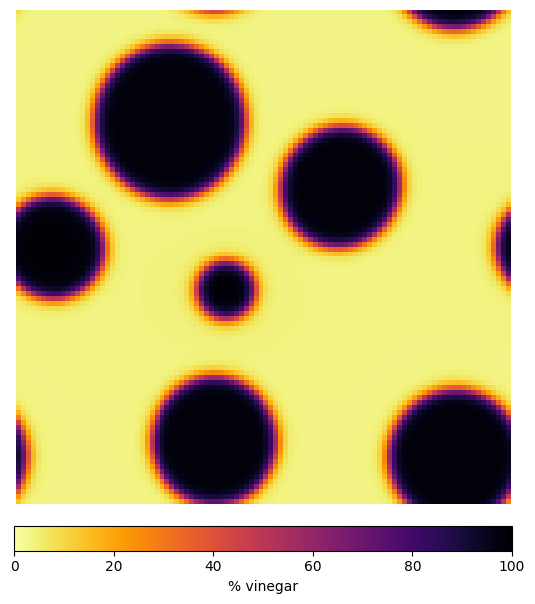

KeyboardInterrupt: ignored

In [ ]:
run_simulation(
    surface_tension = 1.0,
    percent_oil = 70.0
)